In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [46]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
iterations = 2000
dfSkype = pd.read_csv('Skype.csv')
dfTelegram = pd.read_csv('Telegram.csv')
dfWhatsapp = pd.read_csv('Whatsapp.csv')


In [47]:
dfSkype.head()


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,App Name
0,0,gp:AOqpTOGEZYy-BlqAMREMFe6nf-YyiPfvtB3YI2XOo8c...,J Steele,https://play-lh.googleusercontent.com/a/AATXAJ...,"Suddenly can not send media through my phone, ...",1,26,8.81.0.268,2022-03-16 05:50:06,NaN,NaN,Skype
1,1,gp:AOqpTOFRK-4r3CFo22QviGRzqs3m9gVsEem5NIqq8Uj...,Jess,https://play-lh.googleusercontent.com/a-/AOh14...,Skype has gone way down hill. The makers of th...,1,45,8.81.0.268,2022-03-16 06:46:15,NaN,NaN,Skype
2,2,gp:AOqpTOHQsNYtHGx4O-qkWdAfXPz5gTAocesMy5rb8E6...,Jessica Rinaldi,https://play-lh.googleusercontent.com/a-/AOh14...,Stopped working out of nowhere last week. Lite...,1,84,8.81.0.268,2022-03-04 05:18:22,NaN,NaN,Skype
3,3,gp:AOqpTOGU2W7Yo__DD-IvhTfBfuVL32NUtnMJXB7mgUm...,Steve Paige,https://play-lh.googleusercontent.com/a-/AOh14...,I have a Chrome Box. Skype used to open by its...,1,1,8.81.0.268,2022-03-16 19:53:39,NaN,NaN,Skype
4,4,gp:AOqpTOH3046rnC6z2oO1zRb2L188gJlG5-iClefb1Ls...,Judith Smith,https://play-lh.googleusercontent.com/a/AATXAJ...,Can't send text messages at all. It just keeps...,1,17,8.81.0.268,2022-03-15 10:00:48,NaN,NaN,Skype


In [48]:
dfTelegram.head()


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,App Name
0,0,gp:AOqpTOFcvRt1ZoHc8i2TkwI-5xEsP_s2sRbRWxxKUQH...,Daniel Robinson,https://play-lh.googleusercontent.com/a-/AOh14...,WhatsApp started being a problem so I switched...,3,539,8.6.0,2022-03-13 10:54:36,Sorry for the inconvenience – the latest versi...,2022-03-13 22:58:11,Telegram
1,1,gp:AOqpTOEYFNqyqXlCm_KXKDnKE5Y6bhlohBmtr8dbfcE...,Lavendeer 201,https://play-lh.googleusercontent.com/a-/AOh14...,App is great but it is annoying every time to ...,3,42,8.6.1,2022-03-16 08:00:00,NaN,NaN,Telegram
2,2,gp:AOqpTOH2yKBuvMVJ0_lYVWz9Pg3E30okUOAk1zFaUgi...,Shannon O'Brien,https://play-lh.googleusercontent.com/a-/AOh14...,I use Telegram on both my phone and laptop. I ...,5,38,8.6.1,2022-03-15 20:51:09,NaN,NaN,Telegram
3,3,gp:AOqpTOGg1_Mn9JLsOCoK0YZZqq1SbEP5tABZhrgcrMo...,Rustmane Skytrekker,https://play-lh.googleusercontent.com/a-/AOh14...,I loved this when it was just a simple messeng...,3,11,8.6.1,2022-03-17 12:00:09,NaN,NaN,Telegram
4,4,gp:AOqpTOHmOJ6TrfDBmFPetobSMKTkkxYEwawcB-0WD87...,M P,https://play-lh.googleusercontent.com/a/AATXAJ...,I've been using Telegram for at least 5-6 year...,1,67,8.6.0,2022-03-12 08:19:25,"Hello, you can try contacting support chat thr...",2022-03-12 16:10:39,Telegram


In [49]:
dfWhatsapp.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,App Name
0,0,gp:AOqpTOFx9AVEtE9UpogRdAAxjPsUTYGiEOJwuMGilPU...,Banja Designs,https://play-lh.googleusercontent.com/a-/AOh14...,The videos you upload to your status sometimes...,3,3975,2.22.5.72,2022-03-14 16:04:32,NaN,NaN,Whatsapp
1,1,gp:AOqpTOFMVqMMT_o1YnuPYo9x2ddkkYXAeq2VONQxH3m...,Amanda Viall,https://play-lh.googleusercontent.com/a/AATXAJ...,I absolutely hate this app. I used it just fin...,1,381,2.22.5.72,2022-03-17 05:32:10,NaN,NaN,Whatsapp
2,2,gp:AOqpTOEn982GKGCPwJi1tJH0LAjHEBKaiE8XKHosdYl...,T Light,https://play-lh.googleusercontent.com/a-/AOh14...,I have a problem downloading media that was se...,1,414,2.22.5.72,2022-03-13 20:29:55,NaN,NaN,Whatsapp
3,3,gp:AOqpTOFwb72ktlEuyPFHHz-kqKMo3IW_Cuf4BOAeIjo...,Jim Bergevin Jr.,https://play-lh.googleusercontent.com/a-/AOh14...,A nice alternative to the built in Messenger a...,3,4331,2.22.5.72,2022-03-11 19:35:25,NaN,NaN,Whatsapp
4,4,gp:AOqpTOFOd0ZiL0irB6poPtwcsyw2Gra92NXeibVswOo...,Trisha A,https://play-lh.googleusercontent.com/a-/AOh14...,Since latest update I keep getting msg that Wh...,1,42,2.22.5.72,2022-03-17 06:56:12,NaN,NaN,Whatsapp


All of those files have the same columns which is nice so we can merge them together

In [50]:
merged_df = pd.concat([dfSkype, dfTelegram, dfWhatsapp], ignore_index=True)

Let's say that positive opinions are scored as 4,5 and negative ones are 1,2 > let's plot the most used words in positive and negative reviews

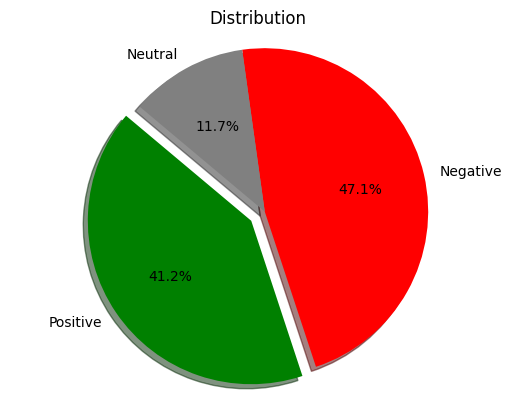

In [51]:
positive_count = merged_df[merged_df['score'] > 3 ].shape[0]
negative_count = merged_df[merged_df['score'] < 3 ].shape[0]
neutral_count  = merged_df[merged_df['score'] == 3 ].shape[0]
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution')
plt.show()



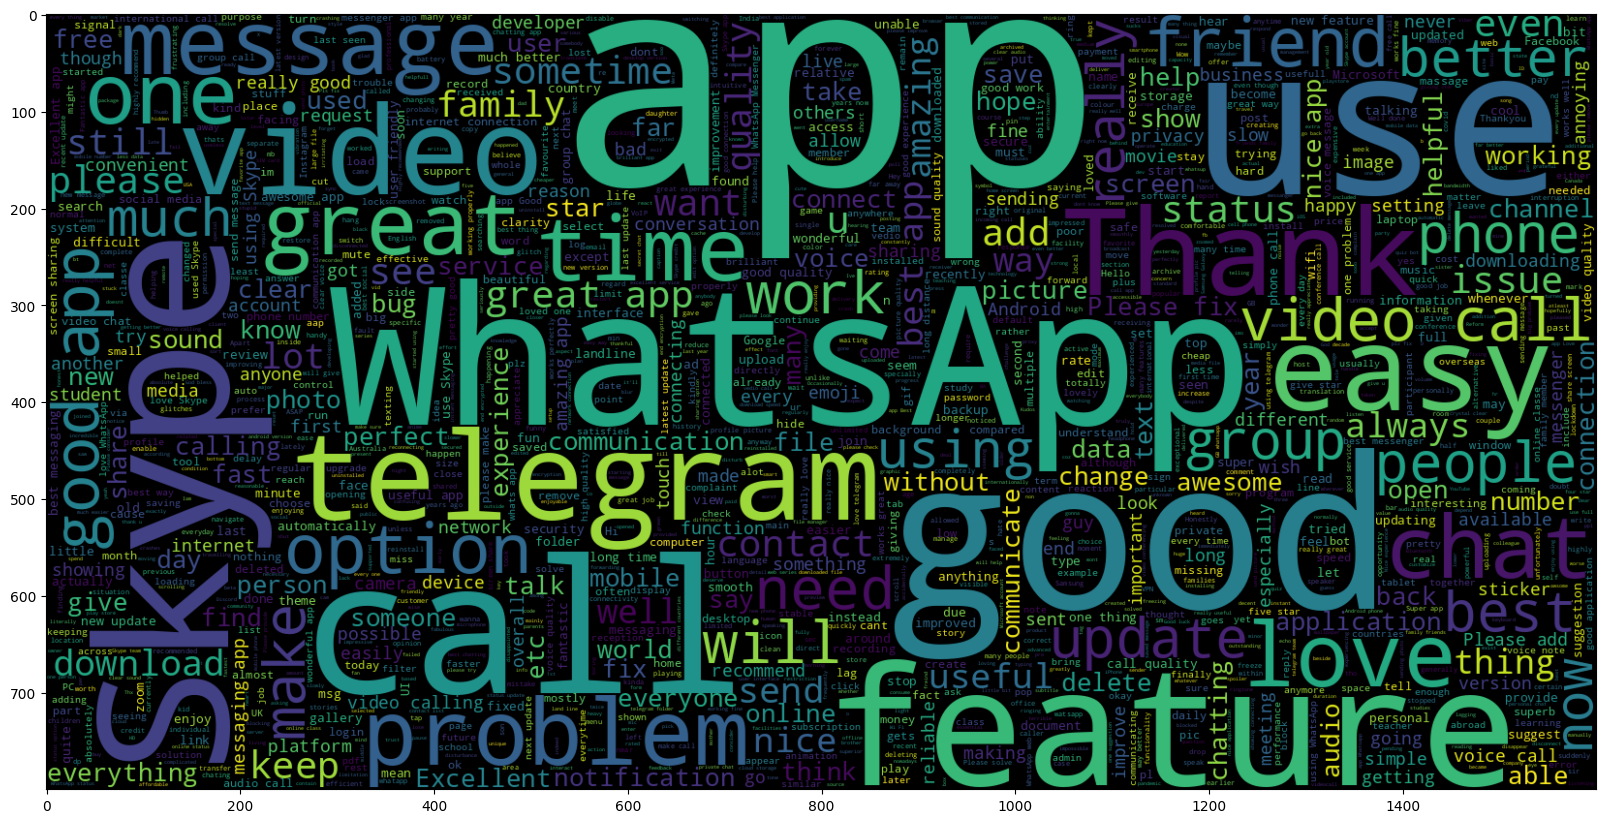

In [52]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(merged_df[merged_df.score > 3].content))
plt.imshow(wc , interpolation = 'bilinear')


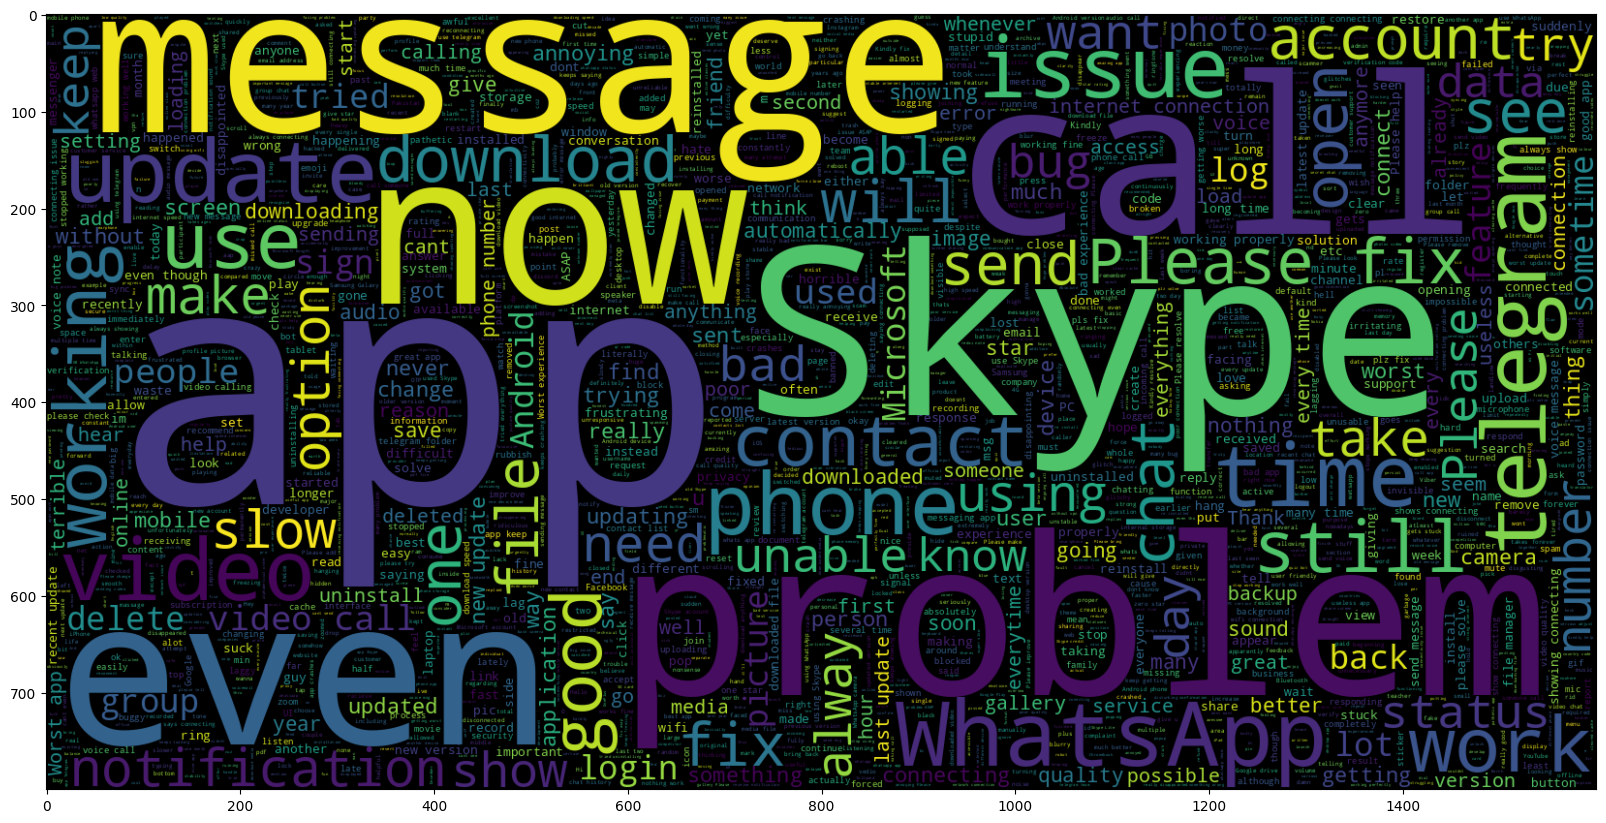

In [53]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(merged_df[merged_df.score < 3].content))
plt.imshow(wc , interpolation = 'bilinear')

In both cases the biggest one are words which aren't negative or positive, but just the ones that are nouns. We should focus on medium size and those which may be "opinion-forming" like for example "good, bad,awesome, dissatisfaction,love, better"
Still we can't get much knowledge from that becouse context is a key.

Now let's how often people post opinions of each score

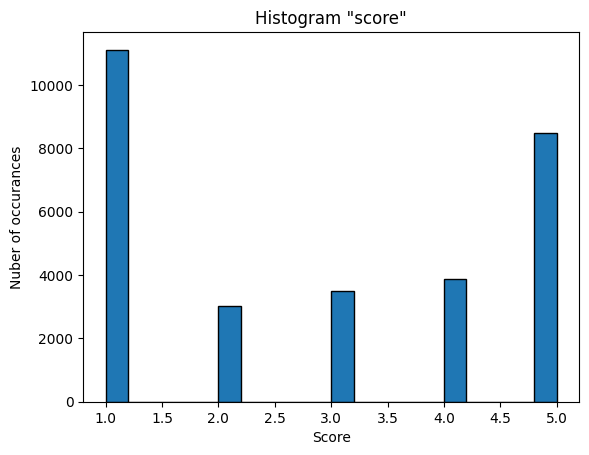

In [54]:
plt.hist(merged_df['score'], bins=20, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Nuber of occurances')
plt.title('Histogram "score"')
plt.show()

People tend to express the most negative opinions when influenced by emotions, often disregarding rationality.

In [55]:
merged_df['content'] = merged_df['content'].apply(lambda x: remove_punctuation(x) if isinstance(x, str) else '')
merged_df = merged_df[merged_df.score != 3]
merged_df.loc[merged_df["score"] <= 2, "score"] = -1
merged_df.loc[merged_df["score"] >= 4, "score"] = 1

Here we prepered data for future steps

In [56]:
smaller_df = merged_df[:10000]
X_train, X_test, y_train, y_test = train_test_split(smaller_df['content'], smaller_df['score'], test_size = 0.3, random_state=42)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [57]:
model = LogisticRegression(max_iter=iterations)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [58]:
coefs = model.coef_.reshape(-1,1)
new_coefs = np.array([coef[0] for coef in coefs])

most_positive_idx = (-new_coefs).argsort()[:10]
most_negative_idx = new_coefs.argsort()[:10]

most_positive = [vectorizer.get_feature_names_out()[i] for i in most_positive_idx]
most_negative = [vectorizer.get_feature_names_out()[i] for i in most_negative_idx]

print('Most positive words: ', *most_positive)
print('Most negative words: ', *most_negative)

Most positive words:  excellent fantastic best clear great perfect thank nice love awesome
Most negative words:  worst rubbish horrible terrible buggy unable useless isnt unreliable frustrating


We can see that our words fit in quite well

In [59]:
most_positive_review_idx = most_positive_idx[0]
most_positive_review_content = smaller_df.iloc[most_positive_review_idx]['content']

print('Most positive review content:')
print(most_positive_review_content)





Most positive review content:
Fantastic social service Intuitive simple stable And calling quality is is brilliant And what a fantastic transition from MSN messenger Been using my MSN for decades and still works Thanks Skype now Microsoft Skype or should I call it MSN


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

most_positive_idx = feature_importances.argsort()[-10:][::-1]
most_negative_idx = feature_importances.argsort()[:10]

most_positive = [vectorizer.get_feature_names_out()[i] for i in most_positive_idx]
most_negative = [vectorizer.get_feature_names_out()[i] for i in most_negative_idx]

print('Most positive words: ', *most_positive)
print('Most negative words: ', *most_negative)


Most positive words:  good great best cant love quality not easy worst excellent
Most negative words:  ꈍᴗꈍ isthe istructuons blessings it5 ita iterating iteration blazingly blazer


We see here that RandomForrestClassifier, did quite interesting thing. It gave us positive and negative words indeed but they seem to be not fitting that well
We can assume that not all kinds of classifiers work the same, and we should chose them very carefully